In [2]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from datetime import date, timedelta
import matplotlib.gridspec as gridspec
import seaborn as sns
#import cmocean


df_test=pd.read_csv('data/Deslocamentos_03_ComDadosEArranjos.csv',encoding = "ISO-8859-1",sep=';')
df_name=pd.read_csv('data/RELATORIO_DTB_BRASIL_MUNICIPIO.csv',encoding = "ISO-8859-1",sep=';')

df_test=df_test.applymap(str)
df_test[['Total_PessTrabEstud_Desloc']] = df_test[['Total_PessTrabEstud_Desloc']].applymap(np.int64)


j_dic={
    'Rio de Janeiro':'RJ',
    'Duque de Caxias':'DdC',
    'Nova Iguaçu':'NI',
    'São João de Meriti':'SJdM',
    'Niterói':'Nt',
    'São Gonçalo':'SG',
    'Belford Roxo':'BR',
    'Nilópolis':'Ns',
    'Mesquita':'Mq',
    'Queimados':'Q',
    'Magé':'Ma'
}

j_sig={v: k for k, v in j_dic.items()}


state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}


capital_dic={
    'AC': 'Rio Branco',
    'AL': 'Maceió',
    'AP': 'Macapá',
    'AM': 'Manaus',
    'BA': 'Salvador',
    'CE': 'Fortaleza',
    'DF': 'Brasília',
    'ES': 'Vitória',
    'GO': 'Goiânia',
    'MA': 'São Luís',
    'MT': 'Cuiabá',
    'MS': 'Campo Grande',
    'MG': 'Belo Horizonte',
    'PA': 'Belém',
    'PB': 'João Pessoa',
    'PR': 'Curitiba',
    'PE': 'Recife',
    'PI': 'Teresina',
    'RJ': 'Rio de Janeiro',
    'RN': 'Natal',
    'RS': 'Porto Alegre',
    'RO': 'Porto Velho',
    'RR': 'Boa Vista',
    'SC': 'Florianópolis',
    'SP': 'São Paulo',
    'SE': 'Aracaju',
    'TO': 'Palmas'
}


UF_dic={
    'AC': 12,
    'AL': 27,
    'AP': 16,
    'AM': 13,
    'BA': 29,
    'CE': 23,
    'DF': 53,
    'ES': 32,
    'GO': 52,
    'MA': 21,
    'MT': 51,
    'MS': 50,
    'MG': 31,
    'PA': 15,
    'PB': 25,
    'PR': 41,
    'PE': 26,
    'PI': 22,
    'RJ': 33,
    'RN': 24,
    'RS': 43,
    'RO': 11,
    'RR': 14,
    'SC': 42,
    'SP': 35,
    'SE': 28,
    'TO': 17
}




# function to return key for any value 
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"








df3=pd.read_csv('data/populacao_municipio.csv')
df3[['Armenor']] = df3[['Armenor']].applymap(str)

def Pop(UF):
    
    if UF != '2211001':
        N=df3.loc[df3['Armenor']==UF].Total.sum()
    else:
        N=864845
    
    return N

    






def Mun_list(s,n):


    capital=str(df_name.loc[df_name['Nome_Município']==capital_dic[s]]['Código Município Completo'].values[0])

    df_Orig=df_test.loc[(df_test['CodMunDest']==capital)&(df_test['CodMunOrig'].str.startswith(str(UF_dic[s])))][['CodMunOrig','Total_PessTrabEstud_Desloc']]

    df_Dest=df_test.loc[(df_test['CodMunOrig']==capital)&(df_test['CodMunDest'].str.startswith(str(UF_dic[s])))][['CodMunDest','Total_PessTrabEstud_Desloc']]


    df_Orig=df_Orig.nlargest(n, 'Total_PessTrabEstud_Desloc')
    df_Dest=df_Dest.nlargest(n, 'Total_PessTrabEstud_Desloc')

    df_Orig=df_Orig.rename(columns={'CodMunOrig': 'Cod'})
    df_Dest=df_Dest.rename(columns={'CodMunDest': 'Cod'})

    df_Joint=pd.concat([df_Orig,df_Dest])


    df_Joint = df_Joint.groupby(['Cod'])[ 'Total_PessTrabEstud_Desloc'].sum().reset_index()

    df_Joint= df_Joint.nlargest(n, 'Total_PessTrabEstud_Desloc')

    return [s]+[capital]+list(df_Joint.Cod.values)


C:\Users\danie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def Base_line(s):
    if s=='SP':
        Bl=12.738
    elif s=='BA':
        Bl=10.775
    elif s=='RJ':
        Bl=10.95
    return Bl

def flow(i,j):

    N=Pop(i)
    

    flow_t=sum(map(int,df_test.loc[(df_test['CodMunDest']==j)&(df_test['CodMunOrig']==i)].Total_PessTrabEstud_Desloc))
    flow_e=sum(map(int,df_test.loc[(df_test['CodMunDest']==j)&(df_test['CodMunOrig']==i)].PessSoEstud_Desloc))

        
    flow= np.array([(flow_t-flow_e)*((100+ mob[t]-Base_line(s))/100) for t in range(len(mob))])
        
    return flow/N


gammaA=1/3.5
gammaS=1/4
kappa=1/4

def g_a(x):
    
    return (kappa*gammaA/(kappa-gammaA))*(np.exp(-gammaA*x)-np.exp(-kappa*x))
    
def g_s(x):
    
    return ((gammaS**2)*x)*(np.exp(-gammaS*x))
    
def gt(x):
    
    return (p*gammaA*g_s(x) + delta*(1-p)*gammaS*g_a(x))/(gammaA*p + delta*(1-p)*gammaS)
    



#Integral b(t-x)g(x) dx
def Int(b,t,P=None):

    if P==None:
        P=1
    
    Int=0
    
    interval=np.arange(t+1)
    for x in interval:
        
        Int += b[t-x]*gt(x)
        
    return P*Int




def S(t,i):
    return N[i]-(1/p)*np.cumsum(B[i])[t]

def Q(t,i):

    return B[i][t]/S(t,i)

def Sum_flow(i,t,Mun):
    
    Sum=0
    
    for k2 in Mun:
        if k2 != i:
            Sum += flows[i][k2][t]
        
    return Sum




def Theta(t,i,j,Mun):

    if i==j:
        Theta=(1/N[i])*(Int(B[i],t,gamma)*((1-Sum_flow(i,t,Mun))**2))
        
        for k in Mun:
            if k != i:
                Theta+= (1/N[i])*(Int(B[k],t,gamma)*(1-Sum_flow(i,t,Mun))*flows[k][i][t])
    

    else:
        Theta=(1/N[j])*(Int(B[i],t,gamma)*(flows[i][j][t]**2)+Int(B[j],t,gamma)*(1-Sum_flow(j,t,Mun))*flows[i][j][t])
        
        for k in Mun:
            if k != i and k !=j:
                Theta+= (1/N[j])*(flows[i][j][t]*flows[k][j][t]*Int(B[k],t,gamma))
            
        

    return Theta






def Beta(t,Mun):
    
    Thetas=[]
    
    
    
    for i in Mun:
        sub_th=[]
        for j in Mun:
            sub_th.append(Theta(t,i,j,Mun))
        
        Thetas.append(sub_th)
        

    Thetas=np.array(Thetas)
    
    
    
    Qs=np.array([Q(t,i) for i in Mun])
    

    
    Betas=np.linalg.solve(Thetas, Qs)
    
    Betas_dic={}
    i_uf=0
    for UF in Mun:
        Betas_dic[UF]=Betas[i_uf]
    
        i_uf+=1
    
    return Betas_dic




def Lambda(t,Mun):
    
    Betas=Beta(t,Mun)
    
    Lambdas={}
    for i in Mun:
        semi_Lambdas={}
        for j in Mun:
            
            if i==j:

                Lambda= (Betas[i]/N[i])*((1-Sum_flow(i,t,Mun))**2)

                for k in Mun:
                    if k != i:
                        Lambda+= (Betas[k]/N[k])*(flows[i][k][t]**2)

            else:

                Lambda= (Betas[i]/N[i])*(flows[j][i][t]*(1-Sum_flow(i,t,Mun)))+ (Betas[j]/N[j])*((1-Sum_flow(j,t,Mun))*flows[i][j][t])

                for k in Mun:
                    if k!= i and k!=j:
                        Lambda+= (Betas[k]/N[k])*(flows[i][k][t]*flows[j][k][t])
            
            semi_Lambdas[j]=Lambda
            
        Lambdas[i]=semi_Lambdas
        
    return Lambdas


def Mun_check(t,Mun_base,B,limit):
    
    Mun=[]
    non_Mun=[]
    for UF in Mun_base:
        if np.cumsum(B[UF])[t] > limit:
            Mun.append(UF)
        else:
            non_Mun.append(UF)
            
    return Mun,non_Mun

# R(t)
def Rt(B,Mun_base,limit):
 
    #Defining the F matrix array
    
    #Data
    
    Rt={}
    
    for i in Mun_base:
        semi_Rt={}
        for j in Mun_base:
            semi_Rt[j]=[]
        Rt[i]=semi_Rt
    
    
    for UF in Mun_base:
        for UF_2 in Mun_base:
            Rt[UF][UF_2].append(np.nan)
    
    
    
    time= np.arange(len(B[Mun_base[0]])-1)+1

    for t in time:
        Mun,non_Mun=Mun_check(t,Mun_base,B,limit)
    
        for UF in Mun_base:
            for UF_2 in Mun_base:
                if (UF in non_Mun) or (UF_2 in non_Mun):
                    Rt[UF][UF_2].append(np.nan)

        
    
        if Mun != []:
            Lambdas=Lambda(t,Mun)
            for i in Mun:
                for j in Mun:
                    Rt[i][j].append(S(t,i)*Lambdas[i][j]*gamma)
            
        
        else:
            for i in Mun:
                for j in Mun:
                    Rt[i][j].append(np.nan)
        
    
    
    
    
    return Rt







def J(Rt_data,Mun_base):

    J={}
    

    for i in Mun_base:
        J_semipar={}
        for j in Mun_base:
            
            J_par=[]
            time= np.arange(len(B[Mun_base[0]]))
            for t in time:

                J_par.append(Rt_data[i][j][t]*Int(B[j],t))

            J_semipar[j]=J_par
            
            
        J[i]=J_semipar

    return J
                
    


In [ ]:
def Run_Net(Mun_l):

    global mob,N,B,flows

    s=Mun_l[0]
    Mun_base=Mun_l[1:]
    
    df=pd.read_csv('data\\Mun.csv')


    dates=df.date.values
    
    
    mob=df.Mobility.values
    B={}
    flows={}
    N={}

    for UF in Mun_base:
        B[UF]=df[UF+'_cases'].values
        N[UF]=Pop(UF)

        semi_flow={}
        for UF_2 in Mun_base:
            if UF_2!=UF:
                semi_flow[UF_2]=flow(UF,UF_2)
            else:
                semi_flow[UF_2]= np.zeros(len(B[UF]))

        flows[UF]=semi_flow


    Rt_data=Rt(B,Mun_base,15)

    J_data=J(Rt_data,Mun_base)

    for UF in Mun_base:
        df_Rt = pd.DataFrame(Rt_data[UF], columns=Rt_data[UF].keys())
        df_J = pd.DataFrame(J_data[UF], columns=J_data[UF].keys())

        df_Rt.insert(0, "date", dates, True) 
        df_J.insert(0, "date", dates, True) 

        df_Rt.to_csv("Output_SEIIR/" + 'RT_' + UF + ".csv", index = False)
        df_J.to_csv("Output_SEIIR/" + 'J_' + UF + ".csv", index = False)



In [ ]:
s='RJ'
delta=0.257755045
p=0.273497044
gamma=p/gammaS + delta*(1-p)/gammaA  
N_Mun=10
Run_Net(Mun_list(s,N_Mun))

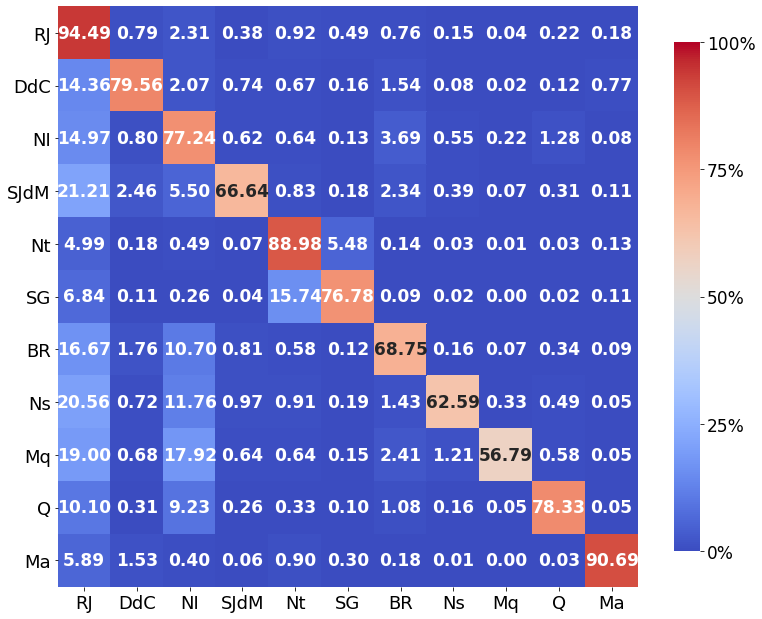

In [4]:
#for s in ['SP','BA','RJ']:
for s in ['RJ']:
    N_Mun=10
    Mun=Mun_list(s,N_Mun)[1:]
    J_m={}

    df=pd.read_csv('data\\Mun.csv')



    for j in Mun:
        J_list=[]
        j_name=df_name[df_name['Código Município Completo']==int(j)]['Nome_Município'].values[0]
        for i in Mun:

            B=df[i+'_cases'].values
            df_J=pd.read_csv('Output_SEIIR\\J_'+i+'.csv')
            J_ij=df_J[j].values
            J_ij_n=J_ij[~np.isnan(J_ij)]        
            J_list.append(100*np.mean(J_ij_n/B[len(J_ij)-len(J_ij_n):]))

        J_m[j_dic[j_name]]=J_list

    df_m=pd.DataFrame.from_dict(J_m)
    df_m['City']=list(df_m.columns) 
    df_m.set_index('City', inplace = True)

    gs = gridspec.GridSpec(nrows = 1, ncols = 1)

    #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
    fig=pl.figure(figsize=(13,13))

    #Definir espaco em branco entre os plots
    gs.update(wspace = 0)
    gs.update(hspace = .05)

    #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
    ax1 = pl.subplot(gs[0, :1]) #Ininicar um plot em branco no centro da primeira linha (0)
    
    #ax5 = pl.subplot(gs[2, 3:])  #Ininicar um plot em branco no segunda posicao da seguna linha

    h1=sns.heatmap(df_m,
                    cmap='coolwarm',
                    annot=True,
                    fmt=".2f",
                    annot_kws={'size':17,'weight':'bold'},
                    cbar=True,
                    square=True,cbar_kws={"shrink": .72},
                   vmin=0, vmax=100, ax=ax1)

    cbar = h1.collections[0].colorbar
    cbar.set_ticks([0, 25, 50 ,75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%','75%', '100%'])


    ax1.tick_params(labelsize=18)
    cbar.ax.tick_params(labelsize=17)

    ax1.set_ylabel('')

    pl.setp(ax1.get_xticklabels(), rotation=0)
    pl.setp(ax1.get_yticklabels(), rotation=0)



    fig.savefig('Figures\\Matrix_SEIIR.png',bbox_inches='tight')
    pl.show() # ta-da!


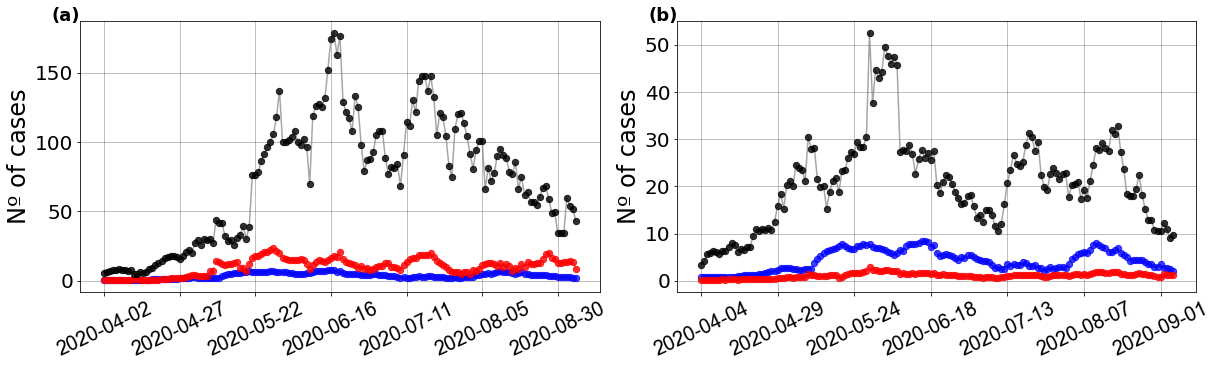

In [5]:
s='RJ'
N_Mun=10
Mun=Mun_list(s,N_Mun)[1:]

df=pd.read_csv('data\\Mun.csv')


Sig=[['SG','RJ','Nt'],['SJdM','RJ','NI']]

Cit=[]
UF_mat=[]
for w in Sig:
    List_cit=[]
    List_uf=[]
    for w2 in w:
        List_cit.append(j_sig[w2])
        List_uf.append(str(df_name[df_name['Nome_Município']==j_sig[w2]]['Código Município Completo'].values[0]))
    UF_mat.append(List_uf)
    Cit.append(List_cit)

#UF_mat[1][0]='3302858'
    
gs = gridspec.GridSpec(nrows = 1, ncols = 2)

#Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
fig=pl.figure(figsize=(20,5))

#Definir espaco em branco entre os plots
gs.update(wspace = .15)
gs.update(hspace = 0)

#Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
ax1 = pl.subplot(gs[0, :1]) #Ininicar um plot em branco no centro da primeira linha (0)
ax2 = pl.subplot(gs[0, 1:])  #Ininicar um plot em branco na primeira posicao da segunda linha

ax1.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.25)
ax2.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.25)

ax=[ax1,ax2]

k=0
#############

for UF_list in UF_mat:



    B=df[UF_list[0]+'_cases'].values
    dates=df['date'].values
    
    
    df_J=pd.read_csv('Output_SEIIR\\J_'+UF_list[0]+'.csv')



    J_1=df_J[UF_list[1]].values
    J_2=df_J[UF_list[2]].values
    J_1_n=J_1[~np.isnan(J_1)]  
    J_2_n=J_2[~np.isnan(J_2)]  
    
    l=len(B)-len(J_2_n)
    
    B=B[l:]
    dates=dates[l:]


    ax[k].plot(dates,J_1_n,lw=1.5,color='grey',linestyle='--',alpha=0.7)
    ax[k].plot(dates,J_2_n,lw=1.5,color='grey',linestyle='--',alpha=0.7)
    ax[k].plot(dates,B,lw=1.5,color='grey',alpha=0.7)


    ax[k].scatter(dates,J_1_n,s=40,alpha=0.75,color='b',zorder=3)
    ax[k].scatter(dates,J_2_n,s=40,color='red',alpha=0.8,zorder=3)
    ax[k].scatter(dates,B,s=40,alpha=0.8,color='k',zorder=3)


    #ax1.legend(loc='upper left',fontsize=15,fancybox=True, shadow=True,framealpha=None,edgecolor='inherit')








    ax[k].tick_params(labelsize=20)








    ax[k].xaxis.set_major_locator(pl.MaxNLocator(8))
    pl.setp(ax[k].get_xticklabels(), rotation=25)








    for tick in ax[k].get_xticklabels():
        tick.set_fontname("Arial")

        
    k+=1
        
        

ax1.set_ylabel('Nº of cases', fontsize=24)
ax2.set_ylabel('Nº of cases', fontsize=24)
        
ax1.text(0, 1.05,'(a)', transform=ax1.transAxes,
      fontsize=18, fontweight='bold', va='top', ha='right')

ax2.text(0, 1.05,'(b)', transform=ax2.transAxes,
      fontsize=18, fontweight='bold', va='top', ha='right')

fig.savefig('Figures\\Time_Series.png',bbox_inches='tight')
pl.show()